In [20]:
# Import relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import time
import seaborn as sns
import random
import math

In [2]:
os.getcwd()

'C:\\Users\\robur\\Documents\\Thesis\\code\\lcfMapping\\markov'

In [3]:
# Read in excel files
pred2015 = pd.read_csv("../../data/output/wurChange/predictions-2015-median.csv")
pred2016 = pd.read_csv("../../data/output/wurChange/predictions-2016-median.csv")
pred2017 = pd.read_csv("../../data/output/wurChange/predictions-2017-median.csv")
pred2018 = pd.read_csv("../../data/output/wurChange/predictions-2018-median.csv")
classes = list(pred2015.columns)

pred2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,2.352941,68.235294,0.000000,29.411765,0.000000,0.0
1,25.327511,6.550218,68.122271,0.000000,0.000000,0.000000,0.0
2,3.947368,23.684211,59.210526,0.000000,0.000000,13.157895,0.0
3,0.000000,8.333333,6.666667,0.000000,75.000000,10.000000,0.0
4,12.987013,14.285714,72.727273,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
30484,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
30485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30487,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0


In [4]:
for i in range(len(classes)):
    print(classes[i])

tree
shrub
grassland
crops
urban_built_up
bare
water


In [5]:
i=1; j=1
# i=6; j=2 #(100,50,15,3)
print("2015:", pred2015.iloc[i][j])
print("2016:", pred2016.iloc[i][j])
print("2017:", pred2017.iloc[i][j])
print("2018:", pred2018.iloc[i][j])

2015: 6.55021834061135
2016: 10.1694915254237
2017: 19.672131147541
2018: 20.0


In [ ]:
# Tryout energy of coocc

In [ ]:
# Energy = RF + Past + Future + Class1 + Class2 + ... + Class6

In [ ]:
# If positive coocc:
# EnergyClass1 = 0

# If negative coocc:
# abs(coocc) * (class*class)

In [5]:
# Read in IIASA Change data 
# Required to calculate cooccurence matrix
#test = gpd.read_file("../data/processed/IIASAchangeHarmonics.gpkg")
#df = pd.DataFrame(test.drop(columns='geometry'))
#df

df = pd.read_csv("../../data/processed/IIASAchangeMerged.csv")
df2015 = df.loc[df['reference_year'] == 2015]
df2016 = df.loc[df['reference_year'] == 2016]
df2017 = df.loc[df['reference_year'] == 2017]
df2018 = df.loc[df['reference_year'] == 2018]

df2015 = df2015[df2015.columns.intersection(classes)]
df2016 = df2016[df2015.columns.intersection(classes)]
df2017 = df2017[df2015.columns.intersection(classes)]
df2018 = df2018[df2015.columns.intersection(classes)]

df2015
(df2015 > 0).sum()

bare               5317
crops              6987
grassland         22551
shrub             16802
tree              15714
urban_built_up     2239
water              2853
dtype: int64

In [6]:
# Read in other datasets
# IIASA 2015

dfTraining = pd.read_csv("../../data/processed/IIASAtrainingMerged.csv")
dfTraining = dfTraining[dfTraining.columns.intersection(classes)]
print(dfTraining[0:10].to_string())

print("\nTotal class occurrence", list((dfTraining > 0).sum()))

   bare  crops  grassland  shrub  tree  urban_built_up  water
0   0.0    0.0       51.0   41.0   0.0             8.0    0.0
1   0.0    0.0       74.0   26.0   0.0             0.0    0.0
2   0.0    0.0       67.0   14.0  19.0             0.0    0.0
3  31.0    0.0       36.0    0.0   0.0             0.0   33.0
4   0.0    0.0        0.0  100.0   0.0             0.0    0.0
5   0.0    0.0       54.0   46.0   0.0             0.0    0.0
6   0.0    0.0       17.0   82.0   1.0             0.0    0.0
7   0.0    0.0      100.0    0.0   0.0             0.0    0.0
8   0.0    0.0       20.0   80.0   0.0             0.0    0.0
9   0.0    0.0       47.0   53.0   0.0             0.0    0.0

Total class occurrence [30279, 23075, 77464, 54904, 69854, 7428, 7928]


In [7]:
binary = (dfTraining > 0).astype(int)
print(binary.T.dot(binary).to_string())

rawnorm = binary.apply(lambda x: (x - x.mean())/x.std())
znorm = rawnorm.T.dot(rawnorm)/(len(rawnorm)-1)
znorm

                 bare  crops  grassland  shrub   tree  urban_built_up  water
bare            30279   4030      11657  12340   7960            3195   1016
crops            4030  23075       8768   9569   9922            2990    760
grassland       11657   8768      77464  43355  38930            5522   3732
shrub           12340   9569      43355  54904  29449            3937   1992
tree             7960   9922      38930  29449  69854            5424   2562
urban_built_up   3195   2990       5522   3937   5424            7428    428
water            1016    760       3732   1992   2562             428   7928


,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,1.000000,-0.048173,-0.187528,0.011000,-0.257167,0.121567,-0.054275
crops,-0.048173,1.000000,-0.163018,0.015837,-0.067705,0.150512,-0.047064
grassland,-0.187528,-0.163018,1.000000,0.374662,-0.006850,0.087763,-0.044707
shrub,0.011000,0.015837,0.374662,1.000000,0.050001,0.064608,-0.073672
tree,-0.257167,-0.067705,-0.006850,0.050001,1.000000,0.107090,-0.090026
urban_built_up,0.121567,0.150512,0.087763,0.064608,0.107090,1.000000,0.000245
water,-0.054275,-0.047064,-0.044707,-0.073672,-0.090026,0.000245,1.000000


<AxesSubplot:>

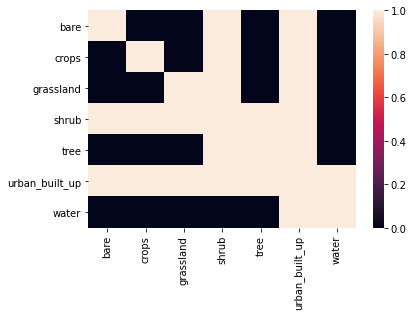

In [8]:
sns.heatmap(znorm > 0)

In [203]:
# WUR change (ACTUAL VALIDATION DATA)
# Let's see if this gives better results

dfVali = pd.read_csv("../../data/processed/WURchangeMerged.csv")
dfVali = dfVali[dfVali.columns.intersection(classes)]
print(dfVali[0:10].to_string())

print("\nTotal class occurrence", list((dfVali > 0).sum()))


   bare  crops  grassland  shrub  tree  urban_built_up  water
0    23     55          0      0     0              22      0
1     0     20          5      0     0              75      0
2     0     72          9     17     2               0      0
3     0     94          0      2     0               0      4
4     2     68          0      0    12              18      0
5    14     47          3      0     7              29      0
6    93      0          0      7     0               0      0
7     5     91          0      0     4               0      0
8    28      0          0      0    12              60      0
9     0     97          0      0     3               0      0

Total class occurrence [10545, 3892, 18745, 9289, 14101, 2460, 3209]


In [206]:
binary = (dfVali > 0).astype(int)
print(binary.T.dot(binary).to_string())

rawnorm = binary.apply(lambda x: (x - x.mean())/x.std())
znorm = rawnorm.T.dot(rawnorm)/(len(rawnorm)-1)
znorm

                 bare  crops  grassland  shrub   tree  urban_built_up  water
bare            10545    949       6133   3874   2915            1157    483
crops             949   3892       1850   1011   1746             673    166
grassland        6133   1850      18745   7462   9220            2035   1172
shrub            3874   1011       7462   9289   4837             871    401
tree             2915   1746       9220   4837  14101            1888    668
urban_built_up   1157    673       2035    871   1888            2460    160
water             483    166       1172    401    668             160   3209


,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,1.000000,-0.079840,-0.042623,0.102208,-0.265113,0.078908,-0.138723
crops,-0.079840,1.000000,-0.105465,-0.035406,-0.008045,0.130261,-0.077006
grassland,-0.042623,-0.105465,1.000000,0.260557,0.082197,0.131235,-0.171694
shrub,0.102208,-0.035406,0.260557,1.000000,0.081380,0.033156,-0.131996
tree,-0.265113,-0.008045,0.082197,0.081380,1.000000,0.182584,-0.172030
urban_built_up,0.078908,0.130261,0.131235,0.033156,0.182584,1.000000,-0.038052
water,-0.138723,-0.077006,-0.171694,-0.131996,-0.172030,-0.038052,1.000000


<AxesSubplot:>

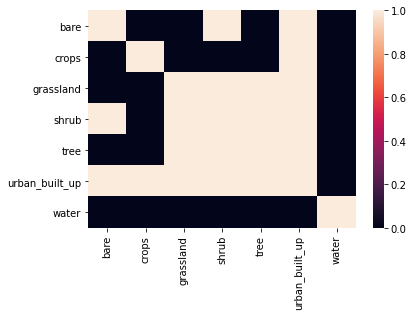

In [207]:
sns.heatmap(znorm > 0)

In [7]:
# Calc coocc

temp = (df2015 > 0).astype(int)
coocc = temp.T.dot(temp)
znorm = coocc.apply(lambda x: (x-x.mean())/x.std()).T
znorm

,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,1.665370,-0.639240,0.773136,0.365579,-0.141616,-0.912258,-1.110971
crops,-0.613135,1.959800,0.024742,0.280072,0.152407,-0.737675,-1.066211
grassland,-0.531502,-0.667403,1.836557,0.680903,0.313972,-0.769579,-0.862948
shrub,-0.611241,-0.577344,1.014393,1.553446,0.436421,-0.830158,-0.985518
tree,-0.709349,-0.564897,0.741085,0.607758,1.655951,-0.766365,-0.964183
urban_built_up,-0.803725,-0.523848,0.693482,0.385074,0.610606,1.235574,-1.597163
water,-0.497448,-0.686104,0.262504,-0.243775,-0.224590,-0.743660,2.133073


<AxesSubplot:>

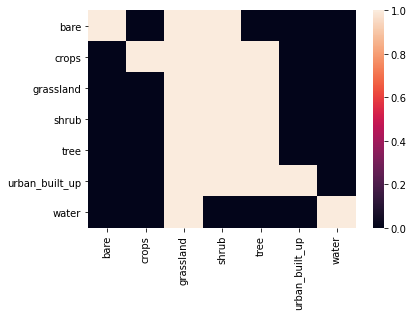

In [6]:
znorm > 0
sns.heatmap(znorm > 0)

In [41]:
# New coocc normalise before multiplication with transpose

binary = (df2015 > 0).astype(int)
# rawnorm = df2015.apply(lambda x: (x-x.mean())/x.std())
rawnorm = df2015.apply(lambda x: (x)/np.sqrt((x**2).sum()))
#rawnorm = binary.apply(lambda x: (x)/np.sqrt((x**2).sum()))

znorm = rawnorm.T.dot(rawnorm)#/(len(rawnorm)-1)
znorm

,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,1.000000,0.021305,0.062780,0.044212,0.019094,0.031306,0.018607
crops,0.021305,1.000000,0.030002,0.053645,0.037884,0.046966,0.003104
grassland,0.062780,0.030002,1.000000,0.199602,0.099011,0.057143,0.019791
shrub,0.044212,0.053645,0.199602,1.000000,0.125258,0.050367,0.008727
tree,0.019094,0.037884,0.099011,0.125258,1.000000,0.079661,0.013248
urban_built_up,0.031306,0.046966,0.057143,0.050367,0.079661,1.000000,0.006429
water,0.018607,0.003104,0.019791,0.008727,0.013248,0.006429,1.000000


In [36]:
# -log test
-math.log(0.0000001)


16.11809565095832

<AxesSubplot:>

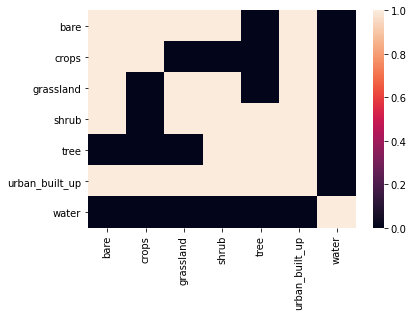

In [8]:
znorm > 0
sns.heatmap(znorm > 0)

In [ ]:
## Start of Markov chain building

RF-values:
 2015: 6.55021834061135
 2016: 10.1694915254237
 2017: 19.672131147541
 2018: 20.0

After smoothing...
 Final node 2015: 9.55021834061135
 Final node 2016: 12.1694915254237
 Final node 2017: 16.672131147541
 Final node 2018: 18.0 



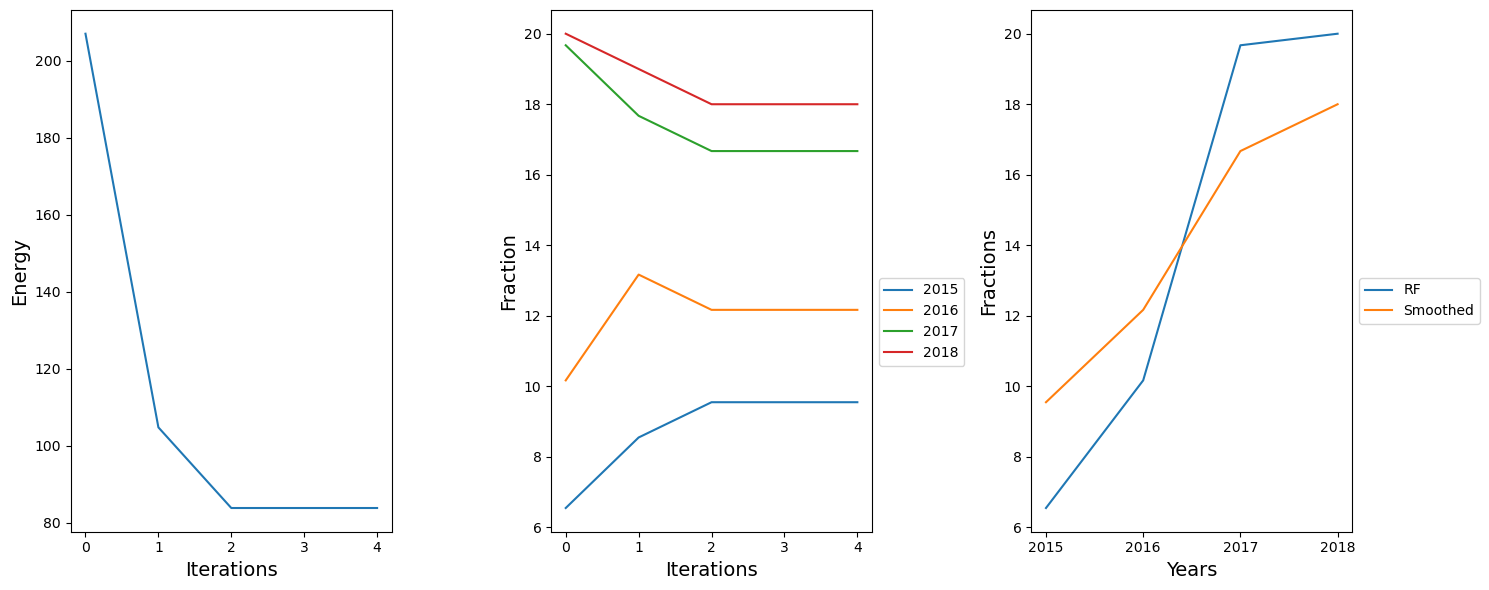

In [154]:
""" 
for 1:7 classes (j):
        pred2015.iloc[i][j]
        pred2016.iloc[i][j]
        pred2017.iloc[i][j]
        pred2018.iloc[i][j]
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

# for 1:7 classes (j):

i=1
j=1

# initialise
rf2015 = pred2015.iloc[i][j]
rf2016 = pred2016.iloc[i][j]
rf2017 = pred2017.iloc[i][j]
rf2018 = pred2018.iloc[i][j]
print("RF-values:")
print(" 2015:", rf2015)
print(" 2016:", rf2016)
print(" 2017:", rf2017)
print(" 2018:", rf2018)

node2015 = rf2015
node2016 = rf2016
node2017 = rf2017
node2018 = rf2018

stepsize = 1
plot = True

nodeSim2015 = []
nodeSim2016 = []
nodeSim2017 = []
nodeSim2018 = []
nodeSim2015.append(node2015)
nodeSim2016.append(node2016)
nodeSim2017.append(node2017)
nodeSim2018.append(node2018)

eTotal = []
eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),(rf2018,node2017))))
e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),(rf2018,node2017)))

for k in range(10):

#     if k == 2:
#         stepsize = 0.1
    
    if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
        break
    
    node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
    nodeSim2015.append(node2015)
    
    node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
    nodeSim2016.append(node2016)
    
    node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
    nodeSim2017.append(node2017)
    
    node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
    nodeSim2018.append(node2018)
    
    nodes = (node2015, node2016, node2017, node2018)
    edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
    e = calc_total_energy(nodes,edges)
    eTotal.append(e)
    

print("\nAfter smoothing...")

print(" Final node 2015:", node2015)
print(" Final node 2016:", node2016)
print(" Final node 2017:", node2017)
print(" Final node 2018:", node2018,"\n")

# print(" Node sim 2015:", [round(elem, 1) for elem in nodeSim2015])
# print(" Node sim 2016:", [round(elem, 1) for elem in nodeSim2016])
# print(" Node sim 2017:", [round(elem, 1) for elem in nodeSim2017])
# print(" Node sim 2018:", [round(elem, 1) for elem in nodeSim2018])
# print(" Energy sim", [round(elem, 1) for elem in eTotal])

if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)

In [9]:
# Set up
smooth2015 = []
smooth2016 = []
smooth2017 = []
smooth2018 = []
t0 = time.time() # timer

# Optimise all 30k points
for i in range(len(pred2015)):
#for i in range(1000):
    
    # List to save updated values in dictionary per class
    listofdicts = []

    # Optimise class by class
    for j in classes:

        # Locate basic RF-values
        rf2015 = pred2015.iloc[i][j]
        rf2016 = pred2016.iloc[i][j]
        rf2017 = pred2017.iloc[i][j]
        rf2018 = pred2018.iloc[i][j]

        # Intialise node's values
        node2015 = rf2015
        node2016 = rf2016
        node2017 = rf2017
        node2018 = rf2018

        # Stepsize to find optimal fraction
        stepsize = 1
        plot = False

        # Keep track of nodes over iterations (useful to check with plot=True)
        nodeSim2015 = []
        nodeSim2016 = []
        nodeSim2017 = []
        nodeSim2018 = []
        nodeSim2015.append(node2015)
        nodeSim2016.append(node2016)
        nodeSim2017.append(node2017)
        nodeSim2018.append(node2018)

        # Keep track of total energy over iterations (necessary) (useful to check with plot=True)
        eTotal = []
        eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),(rf2018,node2017))))
        e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),(rf2018,node2017)))


        # Iterations over one chain
        for k in range(10):

            # Stop if total energy remains stable 3 iterations in a row
            if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
                break

            # Optimise node's value of 2015
            node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
            nodeSim2015.append(node2015)

            # Optimise node's value of 2016
            node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
            nodeSim2016.append(node2016)

            # Optimise node's value of 2017
            node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
            nodeSim2017.append(node2017)

            # Optimise node's value of 2018
            node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
            nodeSim2018.append(node2018)

            # Calculate and store new total energy
            nodes = (node2015, node2016, node2017, node2018)
            edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
            e = calc_total_energy(nodes,edges)
            eTotal.append(e)


        # add class values to listofdicts
        dict1 = {"2015": node2015, "2016": node2016, "2017": node2017, "2018": node2018}
        listofdicts.append(dict1)

    # save per point updated values from listofdicts
    smooth2015.append([dict1["2015"] for dict1 in listofdicts])
    smooth2016.append([dict1["2016"] for dict1 in listofdicts])
    smooth2017.append([dict1["2017"] for dict1 in listofdicts])
    smooth2018.append([dict1["2018"] for dict1 in listofdicts])


# Timer
t1 = time.time()
print(round(t1 - t0, 1), "sec.")

# Lists to df
smooth2015 = pd.DataFrame(smooth2015, columns=classes)
smooth2016 = pd.DataFrame(smooth2016, columns=classes)
smooth2017 = pd.DataFrame(smooth2017, columns=classes)
smooth2018 = pd.DataFrame(smooth2018, columns=classes)

# Replace <0 and >100 values before normalisation
smooth2015[smooth2015 < 0] = 0
smooth2015[smooth2015 > 100] = 100
smooth2016[smooth2016 < 0] = 0
smooth2016[smooth2016 > 100] = 100
smooth2017[smooth2017 < 0] = 0
smooth2017[smooth2017 > 100] = 100
smooth2018[smooth2018 < 0] = 0
smooth2018[smooth2018 > 100] = 100

# Normalise all classes to add up to 100%
smooth2015 = smooth2015.div(smooth2015.sum(axis=1), axis=0) * 100
smooth2016 = smooth2016.div(smooth2016.sum(axis=1), axis=0) * 100
smooth2017 = smooth2017.div(smooth2017.sum(axis=1), axis=0) * 100
smooth2018 = smooth2018.div(smooth2018.sum(axis=1), axis=0) * 100

# Replace NaN values with 0 (NaN resulting from normalisation)
smooth2015 = smooth2015.replace(np.nan, 0)
smooth2016 = smooth2016.replace(np.nan, 0)
smooth2017 = smooth2017.replace(np.nan, 0)
smooth2018 = smooth2018.replace(np.nan, 0)

print("Done")

112.9 sec.
Done


In [15]:
# Save RF in DF, and then replace RF with Node after each class is optimised

t0 = time.time() # timer






i=3

point_data = pd.DataFrame([pred2015.iloc[i],pred2016.iloc[i],pred2017.iloc[i],pred2018.iloc[i]], 
                          index=[2015, 2016, 2017, 2018])
print("RF-values:")
print(point_data.to_string())
#      tree shrub grass crops ... 
# 2015
# 2016
# 2017
# 2018

random.shuffle(classes)

# for j in classes:...
#j=1
for j in range(len(classes)):
    
    #initialise
    rf2015 = point_data[classes[j]].iloc[0]
    rf2016 = point_data[classes[j]].iloc[1]
    rf2017 = point_data[classes[j]].iloc[2]
    rf2018 = point_data[classes[j]].iloc[3]
    
    node2015 = rf2015
    node2016 = rf2016
    node2017 = rf2017
    node2018 = rf2018

    # Stepsize to find optimal fraction
    stepsize = 1
    plot = True

    # Keep track of nodes over iterations (useful to check with plot=True)
    nodeSim2015 = []
    nodeSim2016 = []
    nodeSim2017 = []
    nodeSim2018 = []
    nodeSim2015.append(node2015)
    nodeSim2016.append(node2016)
    nodeSim2017.append(node2017)
    nodeSim2018.append(node2018)

    # Within-year classes
    otherClasses = classes[:j] + classes[j+1:]
    #print("\nOther classes:", otherClasses)
    other2015 = point_data.loc[2015,otherClasses]
    other2016 = point_data.loc[2016,otherClasses]
    other2017 = point_data.loc[2017,otherClasses]
    other2018 = point_data.loc[2018,otherClasses]
   


    t1 = time.time()
    
    
    

    eTotal = []
    eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                    edges = ((rf2015,node2016),
                                             (rf2016,node2015,node2017),
                                             (rf2017,node2016,node2018),
                                             (rf2018,node2017)),
                                    edges_within = (other2015,other2016,other2017,other2018)))

    e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                          edges = ((rf2015,node2016),
                                   (rf2016,node2015,node2017),
                                   (rf2017,node2016,node2018),
                                   (rf2018,node2017)),
                          edges_within = (other2015,other2016,other2017,other2018))
    #print(e) # now edges_wihtin implemented in calc_energy and calc_total_energy
    # todo: implement in optimise_node and minimise_node -> done

    
    
    
    t2 = time.time()

    
    
    
    
    # Iterations over one chain
    for k in range(10):

        
        # Stop if total energy remains stable 3 iterations in a row
        if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
            break

        # Optimise node's value of 2015
        node2015 = optimise_node(node2015, edges=(rf2015,node2016), edges_within=other2015, stepsize=stepsize)
        nodeSim2015.append(node2015)
        
        # Optimise node's value of 2016
        node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), edges_within=other2016, stepsize=stepsize)
        nodeSim2016.append(node2016)

        # Optimise node's value of 2017
        node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), edges_within=other2017, stepsize=stepsize)
        nodeSim2017.append(node2017)

        # Optimise node's value of 2018
        node2018 = optimise_node(node2018, edges=(rf2018,node2017), edges_within=other2018, stepsize=stepsize)
        nodeSim2018.append(node2018)            
            
        # Calculate and store new total energy
        nodes = (node2015, node2016, node2017, node2018)
        edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
        e = calc_total_energy(nodes,edges,(other2015,other2016,other2017,other2018))
        eTotal.append(e)

            
    # print(" Final node 2015:", node2015)
    # print(" Final node 2016:", node2016)
    # print(" Final node 2017:", node2017)
    # print(" Final node 2018:", node2018,"\n")

    # update point_data with optimised nodes
    point_data[classes[j]].iloc[0] = node2015
    point_data[classes[j]].iloc[1] = node2016
    point_data[classes[j]].iloc[2] = node2017
    point_data[classes[j]].iloc[3] = node2018

print("\nNew values:")
print(point_data.to_string())





t3 = time.time() # timer
print("Total run time:", t3-t0)
print("Part run time", t2-t1)





# Now done for one class
# TODO: make it applicable for all classes of this point
if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)

RF-values:
      tree     shrub  grassland  crops  urban_built_up       bare  water
2015   0.0  8.333333   6.666667    0.0       75.000000  10.000000    0.0
2016   0.0  2.352941   7.058824    0.0       85.882353   4.705882    0.0
2017   0.0  0.000000   0.000000    0.0      100.000000   0.000000    0.0
2018   0.0  2.061856   0.000000    0.0       85.567010  12.371134    0.0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [140]:
classes[j]

'tree'

In [132]:
otherClasses = classes[:j] + classes[j+1:]
print(otherClasses)
print(listofdicts[0])

print({ key: listofdicts[0][key] for key in otherClasses })

point_data.loc[2015,otherClasses]

['tree', 'bare', 'urban_built_up', 'grassland', 'crops', 'shrub']
{'tree': 0.0, 'shrub': 8.33333333333333, 'grassland': 6.66666666666667, 'crops': 0.0, 'urban_built_up': 75.0, 'bare': 10.0, 'water': 0.0}
{'tree': 0.0, 'bare': 10.0, 'urban_built_up': 75.0, 'grassland': 6.66666666666667, 'crops': 0.0, 'shrub': 8.33333333333333}


tree               0.000000
bare              10.000000
urban_built_up    75.000000
grassland          6.666667
crops              0.000000
shrub              8.333333
Name: 2015, dtype: float64

In [22]:
# TODO: REPLACE UPDATE OF POINT_DATA IN FOR LOOP BELOW. CHANGE TO LUSTOFDICTS
listofdicts[0][classes[j]]

6.66666666666667

RF-values:
          tree      shrub  grassland  crops  urban_built_up      bare  water
2015  4.761905  10.714286  25.000000    0.0       55.952381  3.571429    0.0
2016  2.580645   7.741935  26.451613    0.0       60.645161  2.580645    0.0
2017  4.761905   7.936508  44.444444    0.0       33.333333  9.523810    0.0
2018  8.474576   8.474576  59.322034    0.0       23.728814  0.000000    0.0

New values:
          tree     shrub  grassland  crops  urban_built_up      bare  water
2015  0.761905  9.714286  26.000000    0.0       52.952381  0.571429    0.0
2016  0.580645  8.741935  30.451613    0.0       50.645161  0.580645    0.0
2017  0.761905  7.936508  39.444444    0.0       38.333333  0.523810    0.0
2018  0.474576  8.474576  46.322034    0.0       30.728814  0.000000    0.0
Total run time: 0.04415583610534668
Part run time 0.0


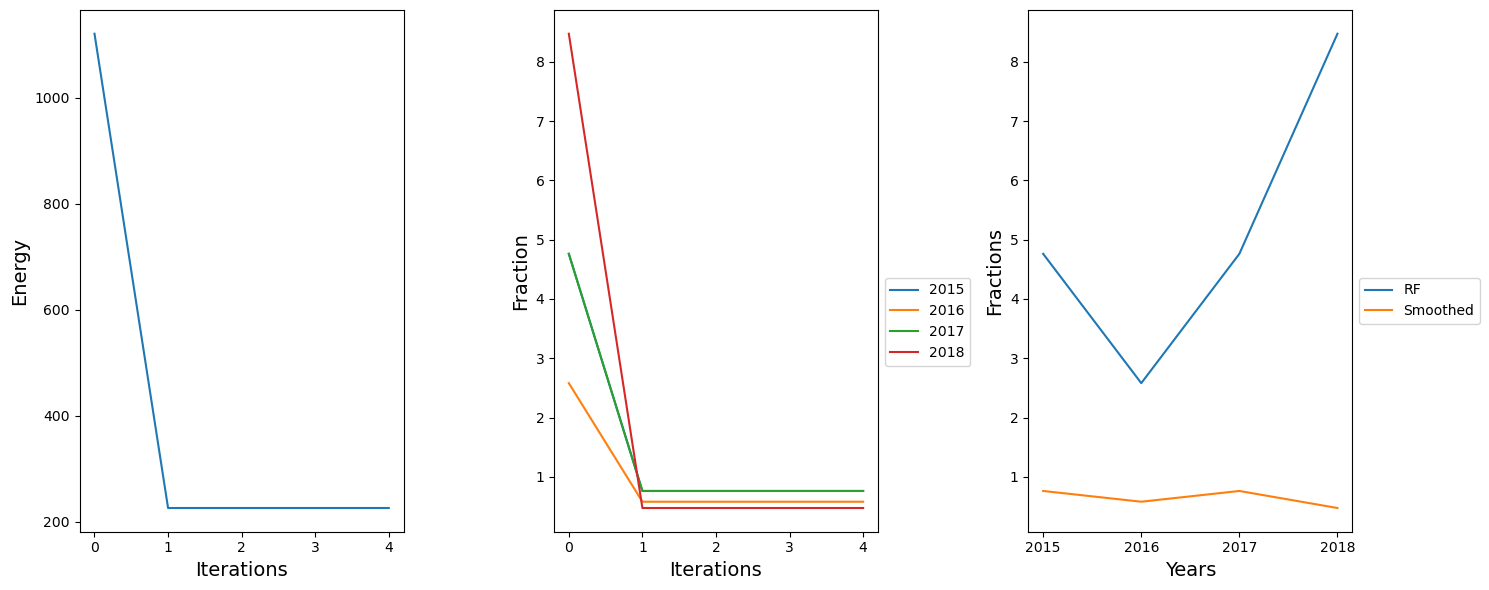

In [121]:
# Save RF in DF, and then replace RF with Node after each class is optimised

t0 = time.time() # timer






i=1383

listofdicts = [dict(pred2015.iloc[i]),dict(pred2016.iloc[i]),dict(pred2017.iloc[i]),dict(pred2018.iloc[i])]
point_data = pd.DataFrame([pred2015.iloc[i],pred2016.iloc[i],pred2017.iloc[i],pred2018.iloc[i]], 
                          index=[2015, 2016, 2017, 2018])
print("RF-values:")
print(point_data.to_string())
#      tree shrub grass crops ... 
# 2015
# 2016
# 2017
# 2018

random.shuffle(classes)

# for j in classes:...
#j=1
for j in range(len(classes)):
    
    #initialise    
    rf2015 = listofdicts[0][classes[j]]
    rf2016 = listofdicts[1][classes[j]]
    rf2017 = listofdicts[2][classes[j]]
    rf2018 = listofdicts[3][classes[j]]
    
    node2015 = rf2015
    node2016 = rf2016
    node2017 = rf2017
    node2018 = rf2018

    # Stepsize to find optimal fraction
    stepsize = 1
    plot = True

    # Keep track of nodes over iterations (useful to check with plot=True)
    nodeSim2015 = []
    nodeSim2016 = []
    nodeSim2017 = []
    nodeSim2018 = []
    nodeSim2015.append(node2015)
    nodeSim2016.append(node2016)
    nodeSim2017.append(node2017)
    nodeSim2018.append(node2018)

    # Within-year classes
    otherClasses = classes[:j] + classes[j+1:]
    #print("\nOther classes:", otherClasses)
    other2015 = {key: listofdicts[0][key] for key in otherClasses}
    other2016 = {key: listofdicts[1][key] for key in otherClasses}
    other2017 = {key: listofdicts[2][key] for key in otherClasses}
    other2018 = {key: listofdicts[3][key] for key in otherClasses}
   

    # Within-year energy 2015
    corr = znorm.loc[classes[j]][other2015.keys()]
    e_abs = abs(corr[corr < 0])
    keys = list(e_abs.index)
    within2015 = sum([other2015[key] * e_abs[key] for key in keys])

    # Within-year energy 2016
    corr = znorm.loc[classes[j]][other2016.keys()]
    e_abs = abs(corr[corr < 0])
    keys = list(e_abs.index)
    within2016 = sum([other2016[key] * e_abs[key] for key in keys])
    
    # Within-year energy 2017
    corr = znorm.loc[classes[j]][other2017.keys()]
    e_abs = abs(corr[corr < 0])
    keys = list(e_abs.index)
    within2017 = sum([other2017[key] * e_abs[key] for key in keys])
    
    # Within-year energy 2018
    corr = znorm.loc[classes[j]][other2018.keys()]
    e_abs = abs(corr[corr < 0])
    keys = list(e_abs.index)
    within2018 = sum([other2018[key] * e_abs[key] for key in keys])
    
    
    t1 = time.time()

    eTotal = []
    eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                    edges = ((rf2015,node2016),
                                             (rf2016,node2015,node2017),
                                             (rf2017,node2016,node2018),
                                             (rf2018,node2017)),
                                    edges_within = (within2015,within2016,within2017,within2018)))

    e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                          edges = ((rf2015,node2016),
                                   (rf2016,node2015,node2017),
                                   (rf2017,node2016,node2018),
                                   (rf2018,node2017)),
                          edges_within = (within2015,within2016,within2017,within2018))
    #print(e) # now edges_wihtin implemented in calc_energy and calc_total_energy
    # todo: implement in optimise_node and minimise_node -> done

    
    
    
    t2 = time.time()

    
    
    
    
    # Iterations over one chain
    for k in range(10):

        
        # Stop if total energy remains stable 3 iterations in a row
        if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
            break

        # Optimise node's value of 2015
        node2015 = optimise_node(node2015, edges=(rf2015,node2016), edges_within=within2015, stepsize=stepsize)
        nodeSim2015.append(node2015)
        
        # Optimise node's value of 2016
        node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), edges_within=within2016, stepsize=stepsize)
        nodeSim2016.append(node2016)

        # Optimise node's value of 2017
        node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), edges_within=within2017, stepsize=stepsize)
        nodeSim2017.append(node2017)

        # Optimise node's value of 2018
        node2018 = optimise_node(node2018, edges=(rf2018,node2017), edges_within=within2018, stepsize=stepsize)
        nodeSim2018.append(node2018)            
            
        # Calculate and store new total energy
        nodes = (node2015, node2016, node2017, node2018)
        edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
        e = calc_total_energy(nodes,edges,(within2015,within2016,within2017,within2018))
        eTotal.append(e)

    
    # print(" Final node 2015:", node2015)
    # print(" Final node 2016:", node2016)
    # print(" Final node 2017:", node2017)
    # print(" Final node 2018:", node2018,"\n")

    # update point_data with optimised nodes
    listofdicts[0][classes[j]] = node2015
    listofdicts[1][classes[j]] = node2016
    listofdicts[2][classes[j]] = node2017
    listofdicts[3][classes[j]] = node2018
    

print("\nNew values:")
#print(point_data.to_string())

print(pd.DataFrame(listofdicts, index=(2015,2016,2017,2018)))



t3 = time.time() # timer
print("Total run time:", t3-t0)
print("Part run time", t2-t1)





# Now done for one class
# TODO: make it applicable for all classes of this point
if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)

In [81]:

s = ((pred2015 > 0).sum(axis=1) > 4)
#print(s[s])

print(pred2015.iloc[1383] , "\n")

print(smooth2015.iloc[1383])


tree               4.761905
shrub             10.714286
grassland         25.000000
crops              0.000000
urban_built_up    55.952381
bare               3.571429
water              0.000000
Name: 1383, dtype: float64 

tree               3.799904
shrub              9.812410
grassland         29.292929
crops              0.000000
urban_built_up    53.487253
bare               3.607504
water              0.000000
Name: 1383, dtype: float64


In [123]:
calc_energy(node2015,(rf2015,node2016),within2015)
# so it seems that e_coocc is probably not that much... results did not change much.
# so maybe higher weight of e_coocc?
# or try to 

44.88286092205796

In [122]:
corr = znorm.loc[classes[j]][other2016.keys()]
e_abs = abs(corr[corr < 0])
print(e_abs)
keys = list(e_abs.index)
within2016 = sum([other2016[key] * e_abs[key] for key in keys])
within2016

water        0.148631
grassland    0.013193
crops        0.048847
bare         0.062388
Name: tree, dtype: float64


0.4379594286138316

In [208]:
# Run on all/part points

# Set up
smooth2015 = []
smooth2016 = []
smooth2017 = []
smooth2018 = []
t0 = time.time() # timer

for i in range(len(pred2015)):
#for i in range(1000):

    listofdicts = [dict(pred2015.iloc[i]),dict(pred2016.iloc[i]),dict(pred2017.iloc[i]),dict(pred2018.iloc[i])]
    
    random.shuffle(classes)

    for j in range(len(classes)):

        #initialise    
        rf2015 = listofdicts[0][classes[j]]
        rf2016 = listofdicts[1][classes[j]]
        rf2017 = listofdicts[2][classes[j]]
        rf2018 = listofdicts[3][classes[j]]

        node2015 = rf2015
        node2016 = rf2016
        node2017 = rf2017
        node2018 = rf2018

        # Stepsize to find optimal fraction
        stepsize = 1
        plot = False

        # Keep track of nodes over iterations (useful to check with plot=True)
        nodeSim2015 = []
        nodeSim2016 = []
        nodeSim2017 = []
        nodeSim2018 = []
        nodeSim2015.append(node2015)
        nodeSim2016.append(node2016)
        nodeSim2017.append(node2017)
        nodeSim2018.append(node2018)

        # Within-year classes
        otherClasses = classes[:j] + classes[j+1:]
        other2015 = {key: listofdicts[0][key] for key in otherClasses}
        other2016 = {key: listofdicts[1][key] for key in otherClasses}
        other2017 = {key: listofdicts[2][key] for key in otherClasses}
        other2018 = {key: listofdicts[3][key] for key in otherClasses}

        # Within-year energy 2015
        corr = znorm.loc[classes[j]][other2015.keys()]
        e_abs = abs(corr[corr < 0])
        keys = list(e_abs.index)
        within2015 = sum([other2015[key] * e_abs[key] for key in keys])

        # Within-year energy 2016
        corr = znorm.loc[classes[j]][other2016.keys()]
        e_abs = abs(corr[corr < 0])
        keys = list(e_abs.index)
        within2016 = sum([other2016[key] * e_abs[key] for key in keys])

        # Within-year energy 2017
        corr = znorm.loc[classes[j]][other2017.keys()]
        e_abs = abs(corr[corr < 0])
        keys = list(e_abs.index)
        within2017 = sum([other2017[key] * e_abs[key] for key in keys])

        # Within-year energy 2018
        corr = znorm.loc[classes[j]][other2018.keys()]
        e_abs = abs(corr[corr < 0])
        keys = list(e_abs.index)
        within2018 = sum([other2018[key] * e_abs[key] for key in keys])

        eTotal = []
        eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),
                                                 (rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),
                                                 (rf2018,node2017)),
                                        edges_within = (within2015,within2016,within2017,within2018)))

        e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                              edges = ((rf2015,node2016),
                                       (rf2016,node2015,node2017),
                                       (rf2017,node2016,node2018),
                                       (rf2018,node2017)),
                              edges_within = (within2015,within2016,within2017,within2018))

        
        # Iterations over one chain
        for k in range(10):

            # Stop if total energy remains stable 3 iterations in a row
            if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
                break

            # Optimise node's value of 2015
            node2015 = optimise_node(node2015, edges=(rf2015,node2016), edges_within=within2015, stepsize=stepsize)
            nodeSim2015.append(node2015)

            # Optimise node's value of 2016
            node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), edges_within=within2016, stepsize=stepsize)
            nodeSim2016.append(node2016)

            # Optimise node's value of 2017
            node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), edges_within=within2017, stepsize=stepsize)
            nodeSim2017.append(node2017)

            # Optimise node's value of 2018
            node2018 = optimise_node(node2018, edges=(rf2018,node2017), edges_within=within2018, stepsize=stepsize)
            nodeSim2018.append(node2018)            

            # Calculate and store new total energy
            nodes = (node2015, node2016, node2017, node2018)
            edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
            e = calc_total_energy(nodes,edges,(within2015,within2016,within2017,within2018))
            eTotal.append(e)

        # update point_data with optimised nodes
        listofdicts[0][classes[j]] = node2015
        listofdicts[1][classes[j]] = node2016
        listofdicts[2][classes[j]] = node2017
        listofdicts[3][classes[j]] = node2018

        
    # Save updated values in list
    smooth2015.append([fraction for fraction in listofdicts[0].values()])
    smooth2016.append([fraction for fraction in listofdicts[1].values()])
    smooth2017.append([fraction for fraction in listofdicts[2].values()])
    smooth2018.append([fraction for fraction in listofdicts[3].values()])


t1 = time.time() # timer
print("Total run time:", t1-t0)
#print("Part run time", t2-t1)

# Lists to df
smooth2015 = pd.DataFrame(smooth2015, columns=list(pred2015.columns))
smooth2016 = pd.DataFrame(smooth2016, columns=list(pred2015.columns))
smooth2017 = pd.DataFrame(smooth2017, columns=list(pred2015.columns))
smooth2018 = pd.DataFrame(smooth2018, columns=list(pred2015.columns))

# Replace <0 and >100 values before normalisation
smooth2015[smooth2015 < 0] = 0
smooth2015[smooth2015 > 100] = 100
smooth2016[smooth2016 < 0] = 0
smooth2016[smooth2016 > 100] = 100
smooth2017[smooth2017 < 0] = 0
smooth2017[smooth2017 > 100] = 100
smooth2018[smooth2018 < 0] = 0
smooth2018[smooth2018 > 100] = 100

# Normalise all classes to add up to 100%
smooth2015 = smooth2015.div(smooth2015.sum(axis=1), axis=0) * 100
smooth2016 = smooth2016.div(smooth2016.sum(axis=1), axis=0) * 100
smooth2017 = smooth2017.div(smooth2017.sum(axis=1), axis=0) * 100
smooth2018 = smooth2018.div(smooth2018.sum(axis=1), axis=0) * 100

# Replace NaN values with 0 (NaN resulting from normalisation)
smooth2015 = smooth2015.replace(np.nan, 0)
smooth2016 = smooth2016.replace(np.nan, 0)
smooth2017 = smooth2017.replace(np.nan, 0)
smooth2018 = smooth2018.replace(np.nan, 0)

print("Done")

Total run time: 1024.5349335670471
Done


In [51]:
28.65/1000*len(pred2015)/60

14.558497499999998

In [197]:
943/60

15.716666666666667

In [55]:
smooth2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,2.376708,80.035651,0.000000,17.587641,0.000000,0.000000
1,27.327511,9.550218,63.122271,0.000000,0.000000,0.000000,0.000000
2,7.017544,24.933546,56.778309,0.000000,0.000000,11.270601,0.000000
3,0.000000,6.333333,5.666667,0.000000,80.000000,8.000000,0.000000
4,9.077791,15.440115,75.482094,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
30484,96.938776,0.000000,0.000000,3.061224,0.000000,0.000000,0.000000
30485,0.000000,0.000000,23.809524,5.952381,0.000000,0.000000,70.238095
30486,0.000000,0.000000,36.956522,0.000000,0.000000,0.000000,63.043478
30487,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000


In [83]:
# RUN TIME WITH COOCC 
# total run time for one point: 0.5s
# run time for one calc energy: 0.007s

# RUN TIME WITHOUT COOCC
# total run time for one point: 0.006s
# run time for one calc energy: 0.0s



# seems to be going long at calc_energy function. 
# managed now to calc e_coocc before calc_energy
# TODO: apply code above with listofdicts in code below, so apply on all points. now only implemented for one point

0.004338741302490234
0.4533963203430176
0.008323431015014648
0.047914743423461914


In [59]:
t0 = time.time()
other2015 = point_data.loc[2015,otherClasses]

print(calc_energy(node2015, (rf2015,node2016), other2015))

t1 = time.time()
#print("Runt time:", t1-t0)

water             0.0
urban_built_up    0.0
grassland         0.0
shrub             0.0
tree              0.0
crops             0.0
Name: 2015, dtype: float64


In [209]:
smooth2015.to_csv("../../data/output/markov/smooth2015-coocc-wurchange15-100.csv",index=False)
smooth2016.to_csv("../../data/output/markov/smooth2016-coocc-wurchange15-100.csv",index=False)
smooth2017.to_csv("../../data/output/markov/smooth2017-coocc-wurchange15-100.csv",index=False)
smooth2018.to_csv("../../data/output/markov/smooth2018-coocc-wurchange15-100.csv",index=False)

In [31]:
smooth2015.to_csv("../../data/output/markov/smooth2015-basic.csv",index=False)
smooth2016.to_csv("../../data/output/markov/smooth2016-basic.csv",index=False)
smooth2017.to_csv("../../data/output/markov/smooth2017-basic.csv",index=False)
smooth2018.to_csv("../../data/output/markov/smooth2018-basic.csv",index=False)

In [188]:
# optimise_node

def optimise_node(node, edges, edges_within, stepsize=5):

    # describe edges
    # 2 edges: rf2015 + node2016
    e = calc_energy(node, edges, edges_within)
    
    # Create empty list to keep track of energy
    eSim = []
    eSim.append(e)
    #print("Initial Energy:", eSim[0])

    #print("Start simulation...")
    node = minimise_energy(node, edges, edges_within, eSim, stepsize)
    #print("New node:", node)
    #print("Energy:", eSim)
    
    
    return node

In [195]:
def calc_energy(node, edges, edges_within):
    
    # Old below
    # Gather co-occurence correlations of other classes
    #corr = znorm.loc[classes[j]][other2015.keys()]#[list(edges_within.index.values)]

    # Only penalise the negative correlations, and take the absolute value
    #e_abs = abs(corr[corr < 0])
    #neg_classes = list(e_abs.index.values)

    # Compute energy of all classes
    # sum(abs(corr)*(node*class))
    #e_coocc = sum([(e_abs[classname] * (node * edges_within[classname])) for classname in neg_classes])

    
    
    # New below
    
    
    e_coocc = edges_within * node * 100
    
    
    # Old below
    edge1 = edges[0]
    edge2 = edges[1]
    
    e1 = (node - edge1)**2
    e2 = (node - edge2)**2
    
    if len(edges) == 3:
        edge3 = edges[2]
        e3 = (node - edge3)**2
        return e1 + e2 + e_coocc + e3
    
    return e1 + e2 + e_coocc


def calc_total_energy(nodes, edges, edges_within):
    
    node2015 = nodes[0]
    node2016 = nodes[1]
    node2017 = nodes[2]
    node2018 = nodes[3]
    
    edges2015 = edges[0]
    edges2016 = edges[1]
    edges2017 = edges[2]
    edges2018 = edges[3]
    
    edges_within2015 = edges_within[0]
    edges_within2016 = edges_within[1]
    edges_within2017 = edges_within[2]
    edges_within2018 = edges_within[3]
    
    e2015 = calc_energy(node2015, edges2015, edges_within2015)
    e2016 = calc_energy(node2016, edges2016, edges_within2016)
    e2017 = calc_energy(node2017, edges2017, edges_within2017)
    e2018 = calc_energy(node2018, edges2018, edges_within2018)
    
    return e2015 + e2016 + e2017 + e2018
    
    
def minimise_energy(node, edges, edges_within, eSim, stepsize):
    
    i = 0
    #print(i)
    
    if calc_energy(node + stepsize, edges, edges_within) < eSim[i] and (node + stepsize) <= 100:
        node = node + stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node + stepsize, edges, edges_within) < eSim[i] and (node + stepsize) <= 100:
            node = node + stepsize
            i += 1
            eSim.append(calc_energy(node,edges, edges_within))
        
    elif calc_energy(node - stepsize, edges, edges_within) < eSim[i] and (node - stepsize) >= 0:
        node = node - stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node - stepsize, edges, edges_within) < eSim[i] and (node - stepsize) >= 0:
            node = node - stepsize
            i += 1
            eSim.append(calc_energy(node, edges, edges_within))
    
    return node


In [190]:
def plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018):

    # Plot energy over iterations
    xs = [x for x in range(len(eTotal))]
    plt.figure(figsize=(15,6), dpi= 100)
    plt.subplot(1, 3, 1)
    plt.plot(xs, eTotal)
    plt.ylabel('Energy', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)

    # Plot nodes over iterations
    xs = [x for x in range(len(nodeSim2015))]
    plt.subplot(1, 3, 2)
    plt.plot(xs, nodeSim2015)
    plt.plot(xs, nodeSim2016)
    plt.plot(xs, nodeSim2017)
    plt.plot(xs, nodeSim2018)
    plt.ylabel('Fraction', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)
    plt.legend(["2015","2016","2017","2018"], loc="upper left", bbox_to_anchor=(1, 0.5))

    xs = ["2015","2016","2017","2018"]
    yRF = [rf2015,rf2016,rf2017,rf2018]
    yNode = [node2015,node2016,node2017,node2018]
    plt.subplot(1, 3, 3)
    plt.plot(xs, yRF)
    plt.plot(xs, yNode)
    plt.ylabel('Fractions', fontsize=14)
    plt.xlabel('Years', fontsize=14)
    plt.legend(["RF","Smoothed"], loc="upper left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()